# Determine cropping parameters for pre-aligned images, to be used for missing/contaminated explant `DenseNet` classification module

The `GMOdetector` workflow includes a module to classify each grid spot (usually holding an explant) as being:
- Significantly contaminated explant
- Explant without significant contamination
- Having no explant

This module uses our implementation of a `DenseNet` neural network, and relies on cropping to extract images for 12 grid spots from a given image of a petri dish. The module can be disabled as described in later documentation, if the user wishes to instead use the 20-explant grid or input missing/contamination data manually. If the module is not disabled, we must provide parameters to assist cropping. The purpose of this notebook is to demonstrate how these parameters should be determined.

## Normalize orientation for grid standard

Where can we find an image of the grid standard? This grid standard should be taken with the same imager settings as the rest of images to be analyzed. <br>
Example (not full-sized): <br>
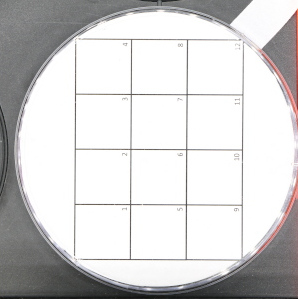

In [1]:
grid_standard_path = "/home/michael/GMOnotebook/1_decide_parameters/1_cropping_parameters/example_12-spot_grid.jpg"

Camera settings can sometimes cause the camera to take images in either portrait or landscape mode. However, the camera is always facing downwards and we wish to always have them in the same orientation. Here, we use `exiftool` to standardize the orientation.

In [2]:
import os

In [3]:
exiftool_command = \
'exiftool -Orientation=8 -n "' + \
grid_standard_path + \
'" > "log_exiftool.txt"'

In [4]:
exiftool_command

'exiftool -Orientation=8 -n "/home/michael/GMOnotebook/1_decide_parameters/1_cropping_parameters/example_12-spot_grid.jpg" > "log_exiftool.txt"'

In [5]:
os.system(exiftool_command)

0

## Scale grid standard to 2000x2000 and rotate image so that label is on bottom

Our `DenseNet` classification module relies on images being of size 2000x2000 and being oriented such that the label is on the bottom. As the images are collected in 4000x4000 with labels on the right, we must resize and reorient the grid standard as follows.

In [10]:
from PIL import Image, ImageOps

In [9]:
file_in = Image.open(grid_standard_path).convert("RGB")
file_in = file_in.resize((2000,2000))
file_in = file_in.rotate(270)
file_in.save(grid_standard_path.replace('.jpg', '_pre-densenet.jpg'))

We will produce another version to be used later for alignment with hyperspectral data.

In [12]:
file_in = Image.open(grid_standard_path).convert("RGB")
#file_in = file_in.rotate(90)
file_in = ImageOps.flip(file_in)
file_in.save(grid_standard_path.replace('.jpg', '_pre-scikit.jpg'))

## Find grid borders

We can easily find the borders of the grid using a mouse and a graphical interface such as GNU Image Manipulation Program (GIMP) or even Microsoft Paint. Below are screenshots illustrating how to do so using GIMP.

Let's open our new version of the grid standard, which will have the suffix `pre-densenet.jpg` after running the first two sections of this notebook.<br>

***Top:*** When we point the cursor at the middle of the top border, we can see on the status bar (bottom) that our cursor is at x,y position 999,507. For the top and bottom borders, we are interested in the y position. Thus, the top grid border position is **507**.<br>
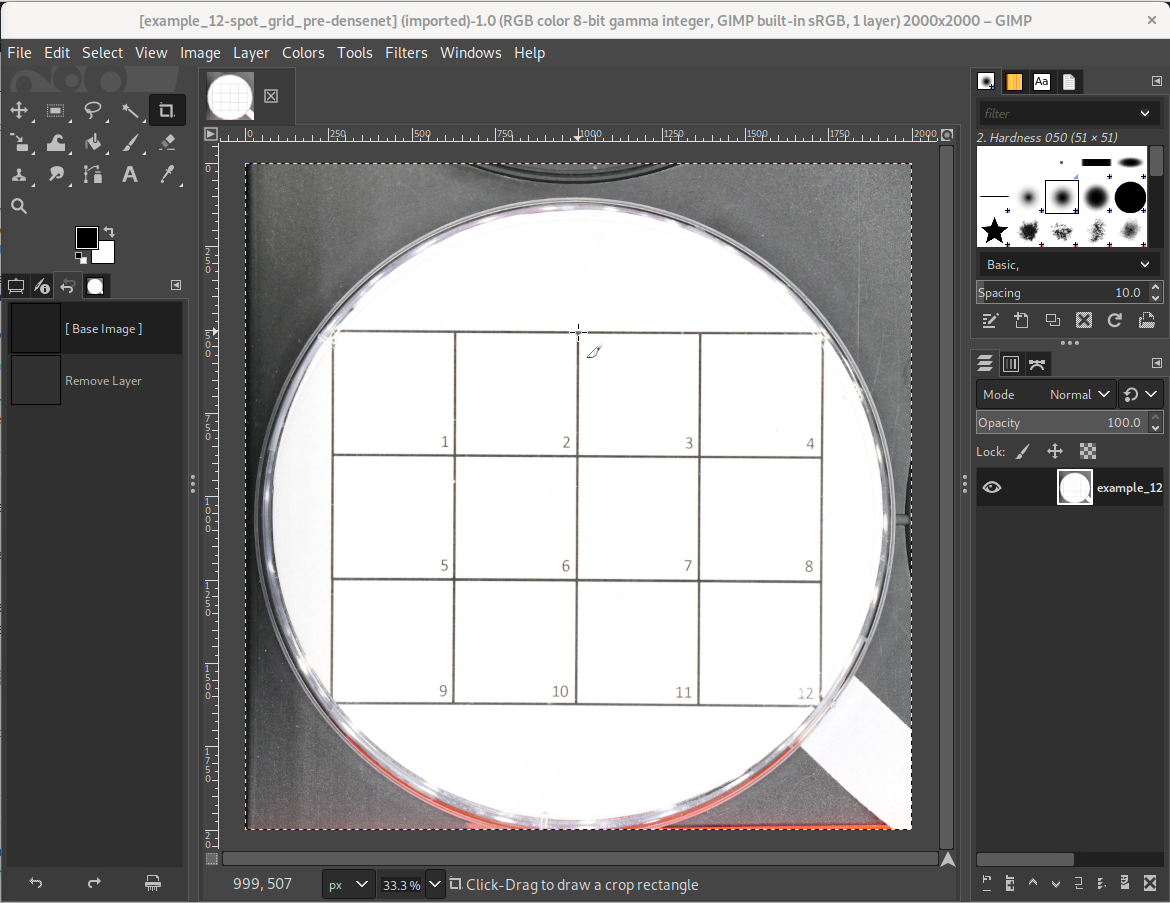

***Bottom:*** With cursor at the middle of the bottom border, we can see that the position is **1620**.<br>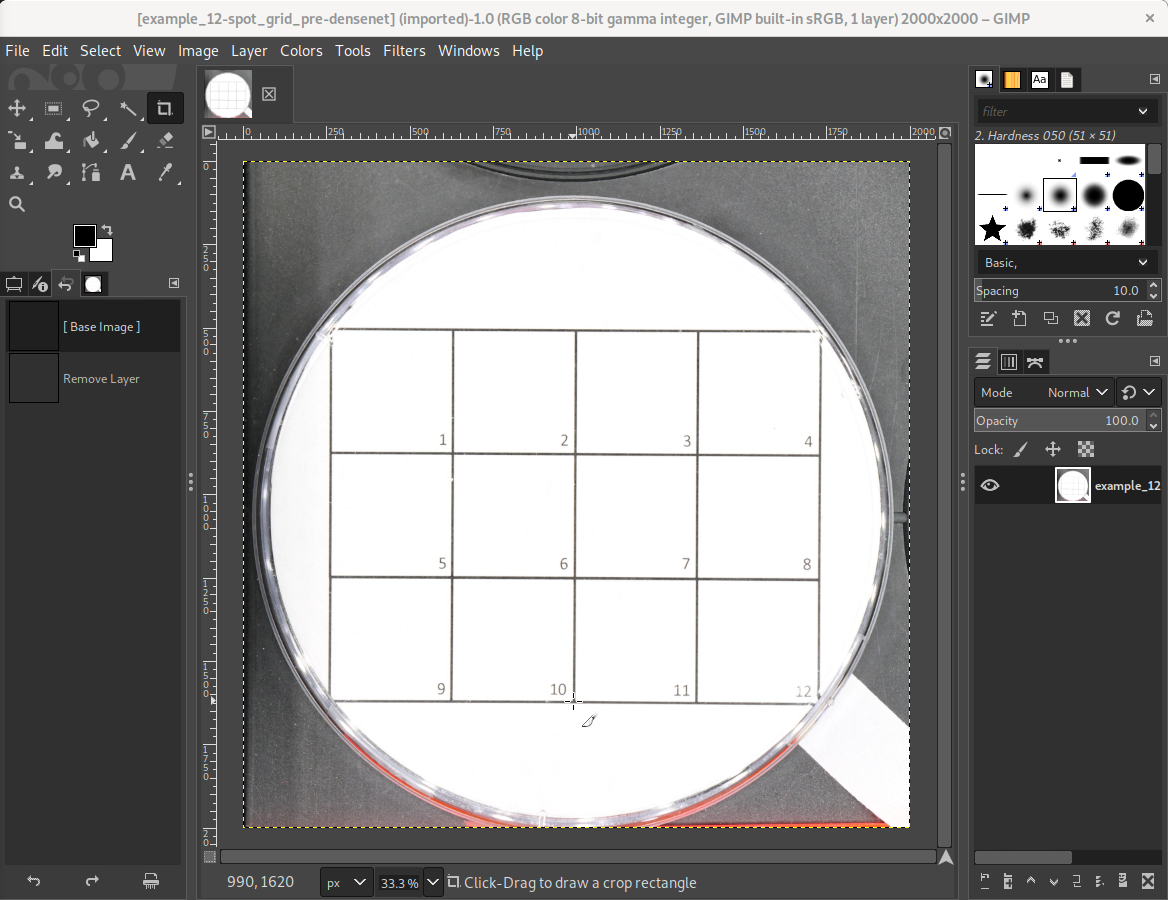

***Left:*** With the cursor at the middle of the left border, we can now see the cursor is at x,y position 261,1032. For left and right borders, we're interested in the x position. Thus, the left grid border position is **261**.<br>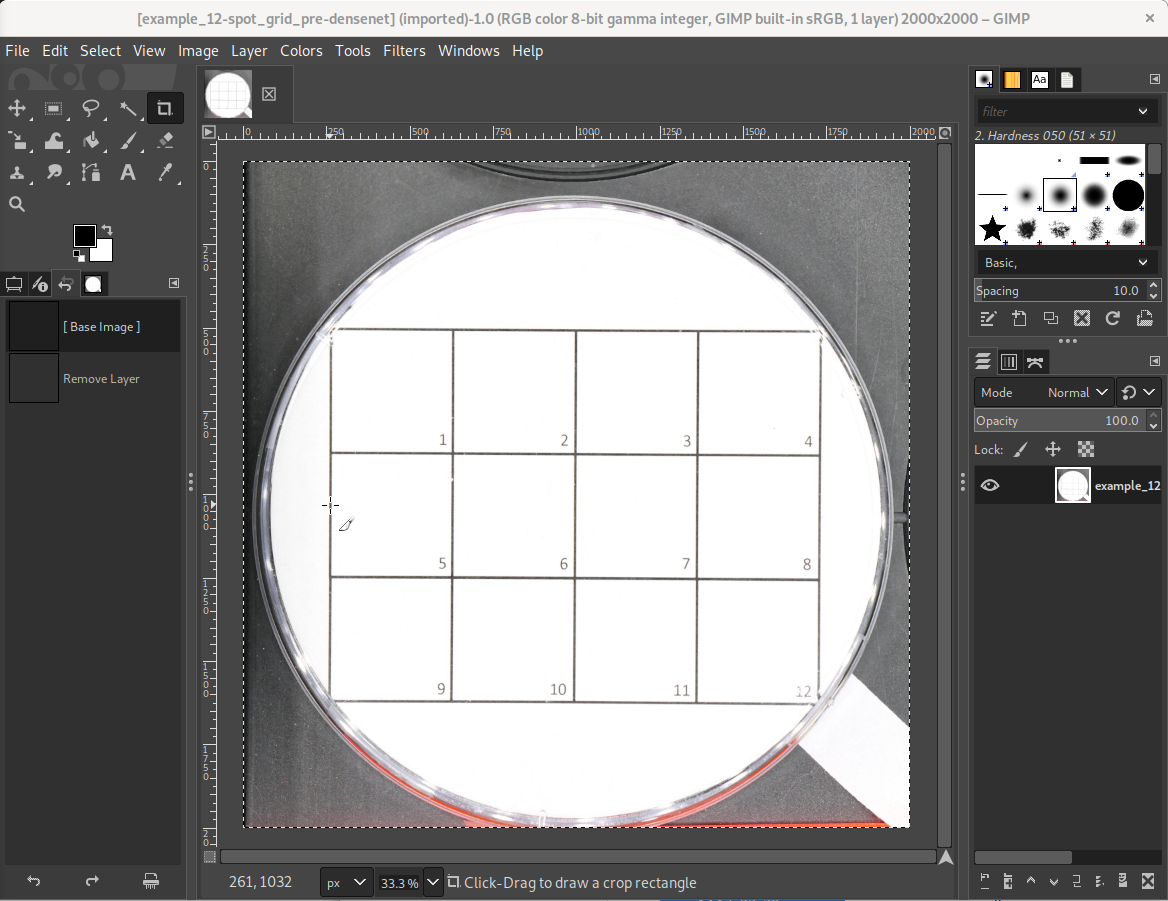

***Right:*** With cursor at the middle of the right border, we can see that the position is **1728**.<br>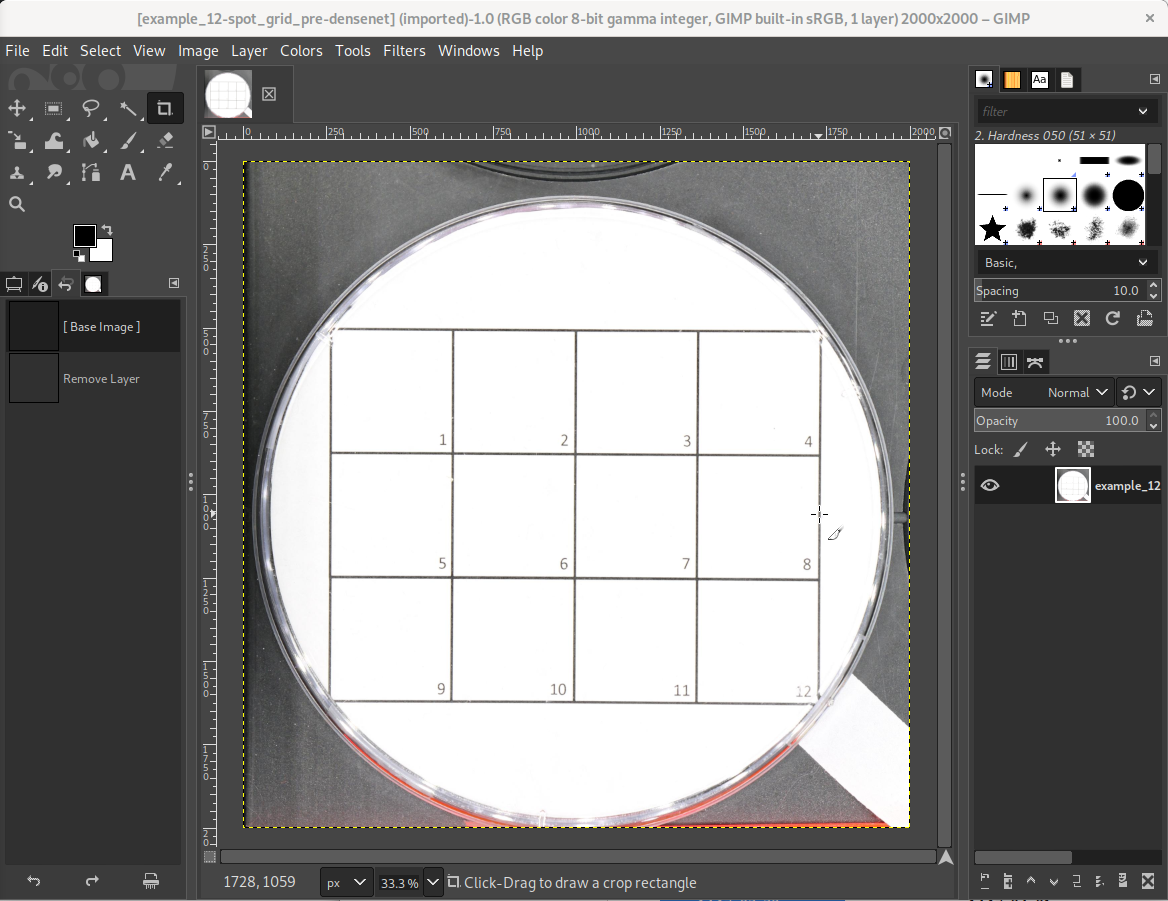

As an input to the `GMOdetector` workflow notebook, we will put these four grid border positions in the order *left, top, right, bottom*. They should be separated by a comma and no space. The exact formatting for the `pre_aligned_resized_grid_borders` parameter is shown below.